# ***Cactus Aerial Photos DataSet***

In this dataset, we are presenting more than 16,000 examples of a columnar cacti (Neobuxbaumia tetetzo) for plant recognition or classification.



In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

In [2]:
import zipfile


zip_files = ['124738_300689_bundle_archive']
# Will unzip the files so that you can see them..
for zip_file in zip_files:
    with zipfile.ZipFile("{}.zip".format(zip_file),"r") as z:
        z.extractall(".")
        print("{} unzipped".format(zip_file))

124738_300689_bundle_archive unzipped


# Data Preprocessing

In [28]:
train_dir= '/content/training_set/training_set'
valid_dir = '/content/validation_set/validation_set'

In [30]:
#we are using ImageDataGenerator to read images from directories
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
valid_datagen= ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
  train_dir, target_size=(32,32), shuffle=True, class_mode= "binary",  batch_size=32)

valid_generator= valid_datagen.flow_from_directory(
    valid_dir,  target_size=(32,32),
    batch_size=32,shuffle=True,
    class_mode='binary')


Found 17500 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


# Model

In [31]:
from keras import backend
backend.clear_session()

In [32]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))



model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)       

In [33]:
model.compile(loss="binary_crossentropy", 
             optimizer='rmsprop',
             metrics=["accuracy"])
print("[INFO]: model compiled...")

[INFO]: model compiled...


In [34]:
history = model.fit_generator(train_generator,  epochs=10, validation_data= valid_generator)

Epoch 1/10
547/547 [==============================] - 82s 150ms/step - loss: 0.1507 - accuracy: 0.9551 - val_loss: 1.1485 - val_accuracy: 0.7088
Epoch 2/10
547/547 [==============================] - 81s 149ms/step - loss: 0.0533 - accuracy: 0.9852 - val_loss: 0.1319 - val_accuracy: 0.9613
Epoch 3/10
547/547 [==============================] - 81s 149ms/step - loss: 0.0338 - accuracy: 0.9923 - val_loss: 0.4217 - val_accuracy: 0.9560
Epoch 4/10
547/547 [==============================] - 82s 150ms/step - loss: 0.0329 - accuracy: 0.9931 - val_loss: 0.0036 - val_accuracy: 0.9137
Epoch 5/10
547/547 [==============================] - 87s 160ms/step - loss: 0.0257 - accuracy: 0.9943 - val_loss: 0.0135 - val_accuracy: 0.9778
Epoch 6/10
547/547 [==============================] - 81s 149ms/step - loss: 0.0231 - accuracy: 0.9954 - val_loss: 0.2387 - val_accuracy: 0.9553
Epoch 7/10
547/547 [==============================] - 81s 149ms/step - loss: 0.0151 - accuracy: 0.9970 - val_loss: 0.3591 - val_ac

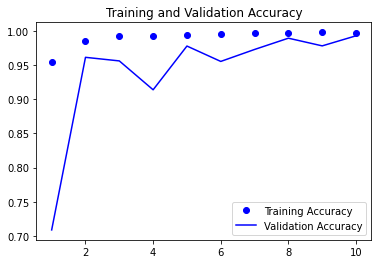

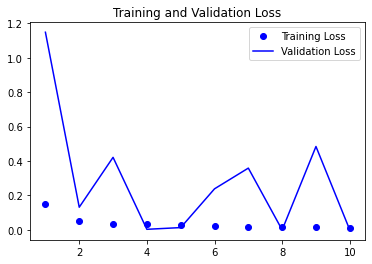

In [35]:
import matplotlib.pyplot as plt

acc= history.history['accuracy']
val_acc = history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()



# Data Augmentation

In [36]:
from keras import backend
backend.clear_session()

## Preprocessing

In [43]:
#we are using ImageDataGenerator to read images from directories
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255,  rotation_range =40, 
                                   width_shift_range=0.2, height_shift_range=0.2, 
                                   shear_range=0.2, zoom_range=0.2, 
                                   horizontal_flip=True)
valid_datagen= ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
  train_dir, target_size=(32,32), shuffle=True, class_mode= "binary",  batch_size=32)

valid_generator= valid_datagen.flow_from_directory(
    valid_dir,  target_size=(32,32),
    batch_size=32,shuffle=True,
    class_mode='binary')


Found 17500 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [44]:
from keras import models
from keras import layers

model=models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 64)       

In [45]:
model.compile(loss="binary_crossentropy", 
             optimizer='rmsprop',
             metrics=["accuracy"])
print("[INFO]: model compiled...")

[INFO]: model compiled...


In [46]:
history = model.fit_generator(train_generator,  epochs=10, validation_data= valid_generator)

Epoch 1/10
547/547 [==============================] - 92s 167ms/step - loss: 0.2480 - accuracy: 0.9203 - val_loss: 0.3994 - val_accuracy: 0.8455
Epoch 2/10
547/547 [==============================] - 95s 174ms/step - loss: 0.1366 - accuracy: 0.9489 - val_loss: 3.5917 - val_accuracy: 0.7508
Epoch 3/10
547/547 [==============================] - 90s 165ms/step - loss: 0.1189 - accuracy: 0.9605 - val_loss: 2.7413 - val_accuracy: 0.8213
Epoch 4/10
547/547 [==============================] - 90s 165ms/step - loss: 0.1037 - accuracy: 0.9651 - val_loss: 0.6259 - val_accuracy: 0.9135
Epoch 5/10
547/547 [==============================] - 90s 165ms/step - loss: 0.0969 - accuracy: 0.9695 - val_loss: 6.2648 - val_accuracy: 0.7857
Epoch 6/10
547/547 [==============================] - 91s 166ms/step - loss: 0.0945 - accuracy: 0.9718 - val_loss: 0.0678 - val_accuracy: 0.9377
Epoch 7/10
547/547 [==============================] - 90s 165ms/step - loss: 0.0826 - accuracy: 0.9752 - val_loss: 0.4033 - val_ac

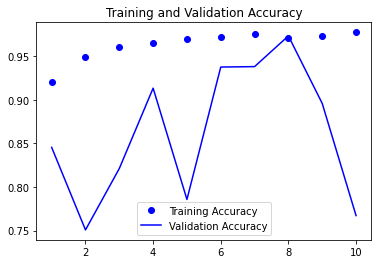

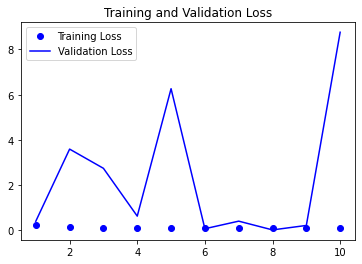

In [47]:
import matplotlib.pyplot as plt

acc= history.history['accuracy']
val_acc = history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

